<a href="https://colab.research.google.com/github/gabriellcortes/ieeecisunb/blob/main/2_periodo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [102]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.cluster import KMeans 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.decomposition import PCA
from scipy.spatial import distance as sci_distance
from sklearn import cluster as sk_cluster

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv" # Vou utilizar o banco de dados Iris por praticidade
colunas = ["sepal-length", "sepal-width", "petal-length", "petal-width", "class"]
dados = pd.read_csv(url, names=colunas)

In [65]:
#verificando a estrutura dos dados importados: são 150 linhas e 5 colunas
print(dados.shape)
#verificando o conteúdo das peimeiras linhas do dataset
dados.head()
dados["class"].unique()

(150, 5)


array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
print(dados.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


# **Regressão linear simples**


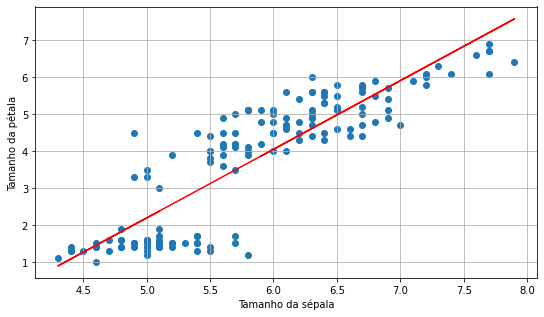

In [ ]:
X = dados['sepal-length']
Y = dados['petal-length']

X = X.values.reshape(-1,1)
Y = Y.values.reshape(-1,1)

linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions


plt.figure(figsize=(9,5))
plt.grid(True) 
plt.xlabel('Tamanho da sépala')
plt.ylabel('Tamanho da pétala')
plt.plot(X, Y_pred, color='red')
plt.scatter(X, Y)
plt.show()

In [ ]:
print("O modelo é: Y = {:.5} + {:.5}X".format(linear_regressor.intercept_[0], linear_regressor.coef_[0][0]))

O modelo é: Y = -7.0954 + 1.8575X


Com o código a baixo criamos um resumo que mostra várias características de nosso modelo. Avaliaremos sua qualidade através do R² e do "p-valor":

In [ ]:
X2 = sm.add_constant(X)
est = sm.OLS(Y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     468.6
Date:                Sat, 15 Jan 2022   Prob (F-statistic):           1.04e-47
Time:                        12:16:50   Log-Likelihood:                -190.49
No. Observations:                 150   AIC:                             385.0
Df Residuals:                     148   BIC:                             391.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.0954      0.506    -14.011      0.0

# **Regressão linear Múltipla**
Semelhante a regressão linear simples, irei procurar a variavel resposta tamanho da pétala.
Construindo o modelo:

In [ ]:
Xs = dados.drop(['petal-length', 'class'], axis=1)

reg = LinearRegression()
reg.fit(Xs, Y)

print("O modelo é: petal-length = {:.5} + {:.5}*sepal-length	 + {:.5}*sepal-width + {:.5}*sepal-width".format(reg.intercept_[0], reg.coef_[0][0], reg.coef_[0][1], reg.coef_[0][2]))

O modelo é: petal-length = -0.25266 + 0.73036*sepal-length	 + -0.65139*sepal-width + 1.4457*sepal-width


vamos analisar a precisão do nosso modelo:

In [ ]:
X = np.column_stack((dados['sepal-length'], dados['sepal-width'], dados['sepal-width']))

X2 = sm.add_constant(X)
est = sm.OLS(Y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     479.0
Date:                Sat, 15 Jan 2022   Prob (F-statistic):           4.07e-65
Time:                        12:40:59   Log-Likelihood:                -146.22
No. Observations:                 150   AIC:                             298.4
Df Residuals:                     147   BIC:                             307.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.5572      0.563     -4.540      0.0

Pelo R² e os p-valores, observa-se que o modelo está bem ajustado e explica mais a variavel petal-length do que a regressão limples.

# **Regressão logistica**
Para a próxima análise, irei criar uma variável booleriana aleatória para fazer a regressão logistica

In [66]:
names = ['Iris-virginica','Iris-versicolor'] #'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'
dados = dados[dados['class'].isin(names)]
dados = dados.sample(frac=1).reset_index(drop=True)

In [67]:
dados["class"] = dados["class"].eq('Iris-virginica').mul(1) #Convertendo em boleriano  

In [68]:
# Divide em treino e teste 70-30
X_train, X_test, y_train, y_test = train_test_split(dados["petal-length"].values.reshape(-1,1), dados["class"].values.reshape(-1,1), test_size = 0.3, random_state=42)

In [69]:
logist = LogisticRegression()
# treina o modelo
logist.fit(X_train, y_train)
# faz predicao e salva em y_pred
y_pred = logist.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [70]:
# acuracia
logist.score(X_test, y_test)

# matriz de confusao
print(confusion_matrix(y_test, y_pred))

# outras metricas
print(classification_report(y_test, y_pred))

[[18  1]
 [ 0 11]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



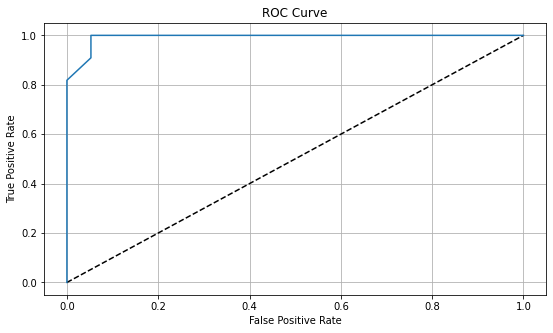

In [116]:
# computa probabilidades
y_pred_prob = logist.predict_proba(X_test)[:,1]

# Gera fpr, tpr e thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# curva ROC
plt.figure(figsize=(9,5))
plt.grid(True) 
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# **Análise de componentes principais**

In [85]:
 dados = pd.read_csv(url, names=colunas)

features = ["sepal-length", "sepal-width", "petal-length", "petal-width"]
# Separando as variaveis
x = dados.loc[:, features].values
# Separando as 'classes'
y = dados.loc[:,['class']].values
# Normalizando 
x = StandardScaler().fit_transform(x)

 Nesta seção, o código projeta os dados originais que são 4 dimensionais em 2 dimensões.

In [87]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [90]:
finalDf = pd.concat([principalDf, dados[['class']]], axis = 1) #unindo novamente


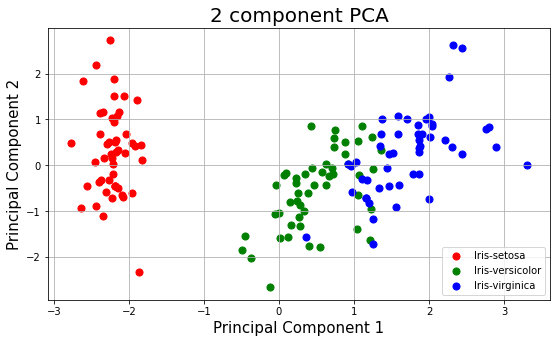

In [115]:
#visualizando
fig = plt.figure(figsize = (9,5))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['class'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [95]:
pca.explained_variance_ratio_ # É a variação atribuida a cada um dos componentes principais, juntos eles contêm 95,80% das informações


array([0.72770452, 0.23030523])

# **Clusterização**

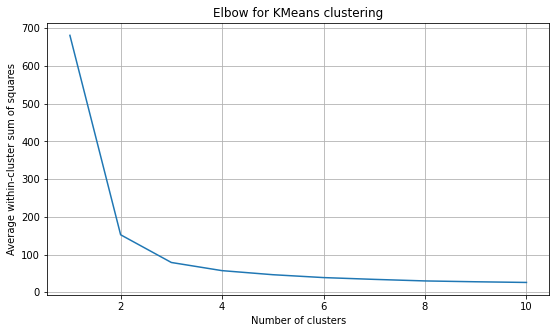

In [114]:
dados = pd.read_csv(url, names=colunas)
x = dados.iloc[:,[0,1,2,3]].values
# encontrando o numero otimo de clusters para k-means
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i,init= 'k-means++',max_iter=300,n_init=10,random_state=0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(9,5))
plt.plot(range(1,11),wcss)
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster sum of squares')
plt.title('Elbow for KMeans clustering')
plt.show()

In [108]:
# De acordo com o gráfico acima, observa-se que o numero ideal de clusters seria 3
kmeans = KMeans(n_clusters=3,init= 'k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans = kmeans.fit_predict(x)

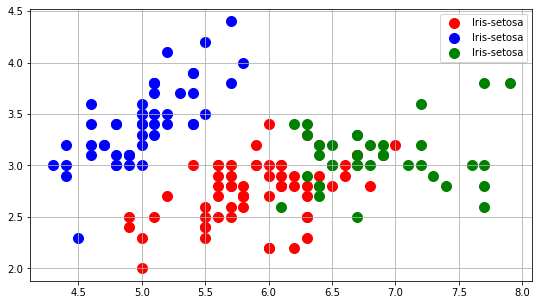

In [113]:
# Visualizando os clusters
plt.figure(figsize=(9,5))
plt.grid(True) 
plt.scatter(x[y_kmeans == 0,0],x[y_kmeans==0,1], s = 100, c = 'red', label= "Iris-setosa")
plt.scatter(x[y_kmeans == 1,0],x[y_kmeans==1,1], s = 100, c = 'blue', label= "Iris-setosa")
plt.scatter(x[y_kmeans == 2,0],x[y_kmeans==2,1], s = 100, c = 'green', label= "Iris-setosa")
plt.legend()
